In [1]:
import os
import clr
import sys
from imp import reload
from System import Array
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
# sys.path.append(os.getcwd())
%matplotlib inline

import qcodes as qc
qc.show_subprocess_widget()

<IPython.core.display.Javascript object>

In [46]:
import qcodes.instrument_drivers.AlazarTech.ATS9440 as ATS_driver
import qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers as ATS_control
try:
    ATS.close()
    ATS_controller.close()
except:
    pass
reload(ATS_driver)
reload(ATS_control)

ATS = ATS_driver.ATS9440('ATS', server_name='Alazar_server')
ATS_controller = ATS_control.Average_AcquisitionController(name='ATS_control', 
                                                           alazar_id=0,
                                                           server_name='Alazar_server')

ATS.config(trigger_source1='CHANNEL_C',
           trigger_level1=135,
           channel_range=2,
           sample_rate=1e6,
           coupling='DC')
ATS_controller.set_acquisitionkwargs(buffer_timeout=5000,
                                     samples_per_record=48000,
                                     records_per_buffer=1,
                                     buffers_per_acquisition=1,
                                     channel_selection='ABCD')


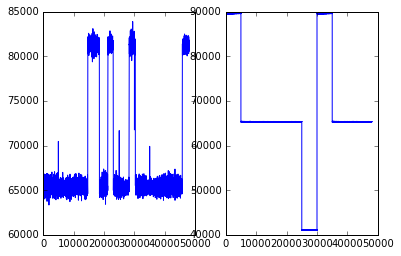

In [47]:
result = ATS_controller.do_acquisition()

# plt.figure()
fig, axes = plt.subplots(1,2)
axes[0].plot(result[0])
axes[1].plot(result[2])